# Inflação no Brasil (2003-2022)

**Neste projeto vamos analisar a evolução da inflação no Brasil, medida pelo IPCA (Índice de Preços ao Consumidor Amplo), que considera uma cesta de consumo ponderada para famílias com uma renda entre 1 e 40 salários mínimos.
O intuito final do projeto é identificar a variação nos preços relativos dos diferentes itens que compõem o índice.**

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

**Iremos extrair todos os dados necessários para nossa análise através da API de séries temporais do Banco Central do Brasil. Para isso, iremos criar uma função que extrai cada série desejada, pois iremos repetir esse processo várias vezes**

In [2]:
def bcb(cod, data_inicial, data_final, nome_coluna):
    '''Retorna um dataframe contendo a série temporal desejada através da API do Banco Central do Brasil
    :cod: int, código da série
    :data_inicial: str, data inicial da série, formato dd/mm/yyyy
    :data_final: str, data final da série, formato dd/mm/yyyy
    :nome_coluna: str, nome que a coluna com os valores receberá'''
    
    link = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{cod}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    df = pd.read_json(link)
    df.index = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df = pd.DataFrame(df['valor'])
    df.columns = [nome_coluna]
    
    return df

In [3]:
ipca = pd.DataFrame()
for i in [433, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643]:
    ipca[f'{i}'] = bcb(i, '01/01/2003', '01/01/2023', f'{i}')
ipca

,433,1635,1636,1637,1638,1639,1640,1641,1642,1643
data,,,,,,,,,,
2003-01-01,2.25,2.15,1.76,1.90,0.94,4.20,0.32,1.44,1.94,1.23
2003-02-01,1.57,1.22,0.18,1.57,0.11,3.00,3.24,0.67,0.64,5.64
2003-03-01,1.23,1.66,1.09,1.19,0.60,0.70,1.58,2.39,0.72,0.92
2003-04-01,0.97,1.01,1.95,0.82,1.03,0.50,0.14,1.54,0.35,0.43
2003-05-01,0.61,0.63,2.27,0.29,1.14,-0.32,0.03,0.71,0.11,0.22
...,...,...,...,...,...,...,...,...,...,...
2022-04-01,1.06,2.06,-1.14,1.53,1.26,1.91,0.08,1.77,0.48,0.06
2022-05-01,0.47,0.48,-1.70,0.66,2.11,1.34,0.72,1.01,0.52,0.04
2022-06-01,0.67,0.80,0.41,0.55,1.67,0.57,0.16,1.24,0.49,0.09


In [4]:
ipca.columns = ['geral', 'alimentos', 'habitacao', 'artigos_residecncia', 'vestuario', 'transporte', 'comunicacao', 'saude', 'gastos_pessoais', 'educacao']
ipca.head()

,geral,alimentos,habitacao,artigos_residecncia,vestuario,transporte,comunicacao,saude,gastos_pessoais,educacao
data,,,,,,,,,,
2003-01-01,2.25,2.15,1.76,1.90,0.94,4.20,0.32,1.44,1.94,1.23
2003-02-01,1.57,1.22,0.18,1.57,0.11,3.00,3.24,0.67,0.64,5.64
2003-03-01,1.23,1.66,1.09,1.19,0.60,0.70,1.58,2.39,0.72,0.92
2003-04-01,0.97,1.01,1.95,0.82,1.03,0.50,0.14,1.54,0.35,0.43
2003-05-01,0.61,0.63,2.27,0.29,1.14,-0.32,0.03,0.71,0.11,0.22


**Agora temos um dataframe contendo todas as variações percentuais mensais do IPCA e de seus diferentes sub-indices**

In [5]:
# verificando informações sobre o dataframe
ipca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 2003-01-01 to 2022-08-01
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   geral                236 non-null    float64
 1   alimentos            236 non-null    float64
 2   habitacao            236 non-null    float64
 3   artigos_residecncia  236 non-null    float64
 4   vestuario            236 non-null    float64
 5   transporte           236 non-null    float64
 6   comunicacao          236 non-null    float64
 7   saude                236 non-null    float64
 8   gastos_pessoais      236 non-null    float64
 9   educacao             236 non-null    float64
dtypes: float64(10)
memory usage: 20.3 KB


**Note que não há valores nulos e todas as variáveis estão no formato desejado (float64). Assim, podemos continuar.**

**Vamos visualizar os dados:**

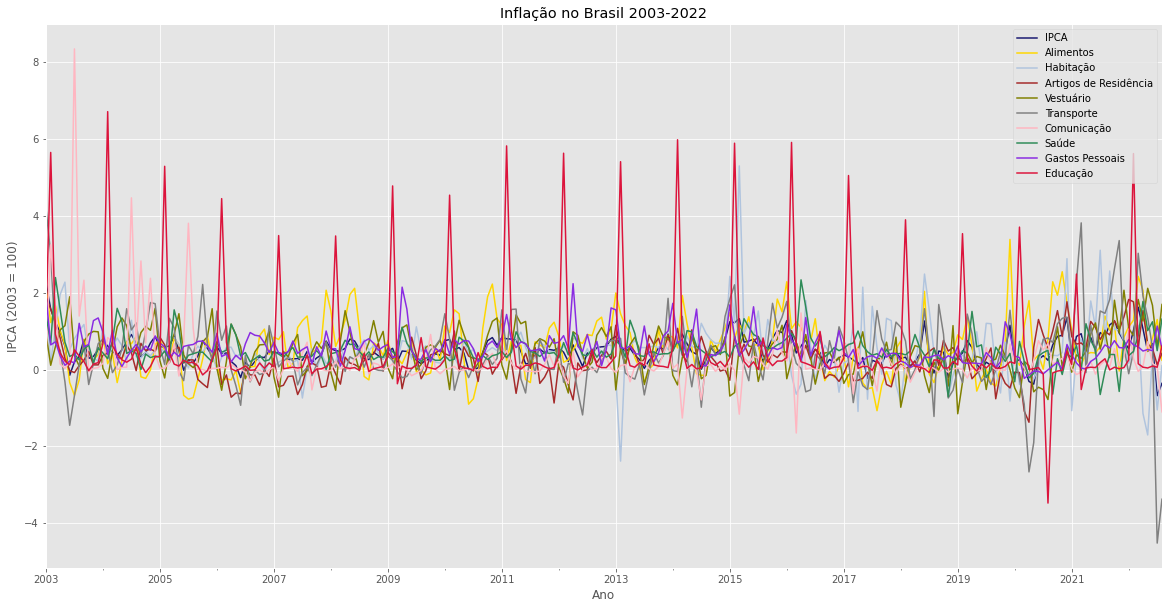

In [6]:
plt.style.use('ggplot')
# plotando o gráfico
ipca.plot(figsize=(20,10), color=['midnightblue', 'gold', 'lightsteelblue', 'brown', 'olive', 'gray', 'lightpink', 'seagreen', 'blueviolet', 'crimson'])
# definindo labels, título e legenda
plt.xlabel('Ano')
plt.ylabel('IPCA (2003 = 100)')
plt.title('Inflação no Brasil 2003-2022')
plt.legend(['IPCA', 'Alimentos', 'Habitação', 'Artigos de Residência', 'Vestuário', 'Transporte', 'Comunicação', 'Saúde', 'Gastos Pessoais', 'Educação'])

plt.show()

**Não é possível extrair muitas informações desse gráfico, que nos apresenta apenas as variações percentuais de cada componente do IPCA. Destaca-se apenas a elevação sazonal na cesta de Educação, muito provavelmente devido ao fato de que o valor de todas as mensalidades escolares só é corrigido anualmente**

**Para uma melhor visualização dos dados, o objetivo agora é criar um dataframe contendo a evolução do número índice de cada item do IPCA, fixando os preços de 01/2003 como 100**

In [7]:
# definindo função
def index_num(df_column):
    '''transforma uma coluna de variações percentuais em uma pd.series contendo a série temporal do número índice
    :df_column: pd.series contendo as variações percentuais
    :return: pd.series com numeros indice'''
    index_num = [100]
    for i in df_column:
        x = index_num[-1] * (1+i/100)
        index_num.append(x)
    return pd.Series(index_num)

In [8]:
index_num(ipca['geral'])

0      100.000000
1      102.250000
2      103.855325
3      105.132745
4      106.152533
          ...    
232    312.924169
233    314.394912
234    316.501358
235    314.349149
236    313.217492
Length: 237, dtype: float64

**Fazendo isso com todas as colunas do df ipca e criando um novo df chamado ipca_indices temos**

In [9]:
ipca_indices = pd.DataFrame(ipca.index)
for j in ipca.columns:
    ipca_indices[f'{j}'] = (index_num(ipca[j]))
ipca_indices

,data,geral,alimentos,habitacao,artigos_residecncia,vestuario,transporte,comunicacao,saude,gastos_pessoais,educacao
0,2003-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2003-02-01,102.250000,102.150000,101.760000,101.900000,100.940000,104.200000,100.320000,101.440000,101.940000,101.230000
2,2003-03-01,103.855325,103.396230,101.943168,103.499830,101.051034,107.326000,103.570368,102.119648,102.592416,106.939372
3,2003-04-01,105.132745,105.112607,103.054349,104.731478,101.657340,108.077282,105.206780,104.560308,103.331081,107.923214
4,2003-05-01,106.152533,106.174245,105.063908,105.590276,102.704411,108.617668,105.354069,106.170536,103.692740,108.387284
...,...,...,...,...,...,...,...,...,...,...,...
231,2022-04-01,309.641964,380.488085,342.719692,187.052663,276.822807,270.402271,173.115786,316.153164,359.703468,359.429780
232,2022-05-01,312.924169,388.326140,338.812687,189.914569,280.310774,275.566955,173.254279,321.749075,361.430044,359.645438
233,2022-06-01,314.394912,390.190106,333.052871,191.168005,286.225332,279.259552,174.501710,324.998741,363.309481,359.789296
234,2022-07-01,316.501358,393.311626,334.418388,192.219429,291.005295,280.851331,174.780912,329.028725,365.089697,360.113106


In [10]:
ipca_indices = ipca_indices.set_index('data')
ipca_indices.head()

,geral,alimentos,habitacao,artigos_residecncia,vestuario,transporte,comunicacao,saude,gastos_pessoais,educacao
data,,,,,,,,,,
2003-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2003-02-01,102.250000,102.150000,101.760000,101.900000,100.940000,104.200000,100.320000,101.440000,101.940000,101.230000
2003-03-01,103.855325,103.396230,101.943168,103.499830,101.051034,107.326000,103.570368,102.119648,102.592416,106.939372
2003-04-01,105.132745,105.112607,103.054349,104.731478,101.657340,108.077282,105.206780,104.560308,103.331081,107.923214
2003-05-01,106.152533,106.174245,105.063908,105.590276,102.704411,108.617668,105.354069,106.170536,103.692740,108.387284


**Podemos visualizar a evolução de cada uma das séries temporáis em um gráfico de linhas.**

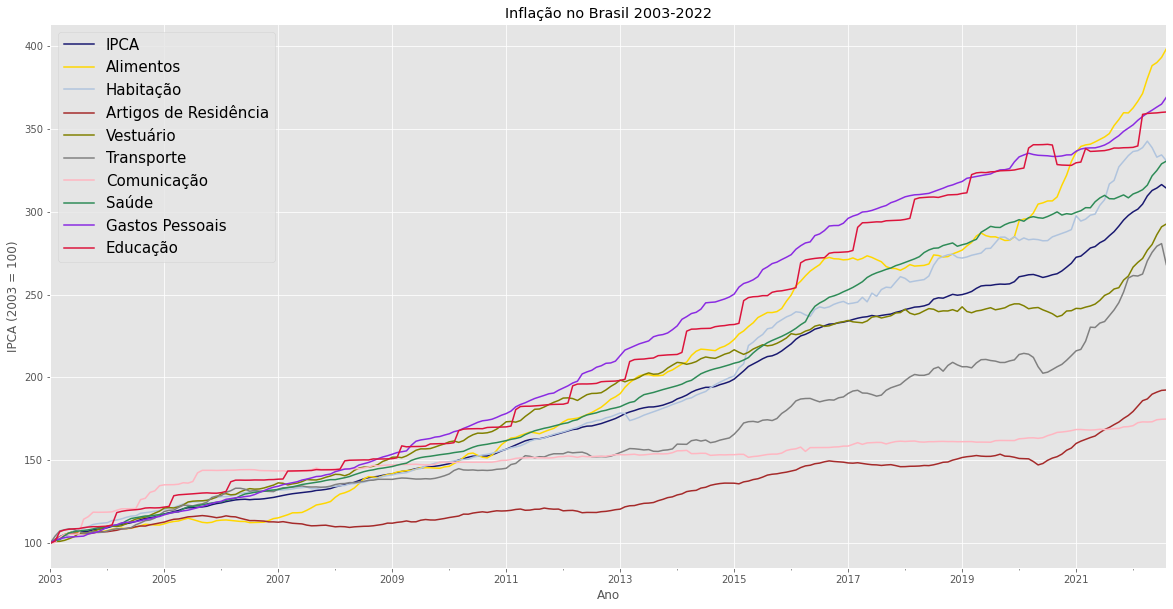

In [11]:
plt.style.use('ggplot')
# plotando o gráfico
ipca_indices.plot(figsize=(20,10), color=['midnightblue', 'gold', 'lightsteelblue', 'brown', 'olive', 'gray', 'lightpink', 'seagreen', 'blueviolet', 'crimson'])
# definindo labels, título e legenda
plt.xlabel('Ano')
plt.ylabel('IPCA (2003 = 100)')
plt.title('Inflação no Brasil 2003-2022')
plt.legend(['IPCA', 'Alimentos', 'Habitação', 'Artigos de Residência', 'Vestuário', 'Transporte', 'Comunicação', 'Saúde', 'Gastos Pessoais', 'Educação'], fontsize=15)

plt.show()

**Este gráfico é interessante, porém não revela muita coisa. Seria interessante visualizar a evolução individual nos preços de cada item quando comparado ao restante da economia. Para isso, faremos algo como "deflacionar" os índices à partir do índice numérico do IPCA.**

In [12]:
ipca_def = (ipca_indices.div(ipca_indices['geral'], axis=0) - 1) * 100
ipca_def

,geral,alimentos,habitacao,artigos_residecncia,vestuario,transporte,comunicacao,saude,gastos_pessoais,educacao
data,,,,,,,,,,
2003-01-01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2003-02-01,0.0,-0.097800,-0.479218,-0.342298,-1.281174,1.907090,-1.887531,-0.792176,-0.303178,-0.997555
2003-03-01,0.0,-0.442052,-1.841174,-0.342298,-2.700190,3.341836,-0.274379,-1.671245,-1.216027,2.969561
2003-04-01,0.0,-0.019155,-1.976926,-0.381677,-3.305731,2.800780,0.070420,-0.544491,-1.713704,2.654234
2003-05-01,0.0,0.020453,-1.025529,-0.529669,-3.248271,2.322258,-0.752185,0.016960,-2.317225,2.105226
...,...,...,...,...,...,...,...,...,...,...
2022-04-01,0.0,22.880013,10.682573,-39.590661,-10.599066,-12.672602,-44.091626,2.102816,16.167545,16.079157
2022-05-01,0.0,24.095924,8.273096,-39.309715,-10.422140,-11.938104,-44.633782,2.820142,15.500840,14.930540
2022-06-01,0.0,24.108276,5.934561,-39.194943,-8.959935,-11.175550,-44.496013,3.372774,15.558321,14.438651


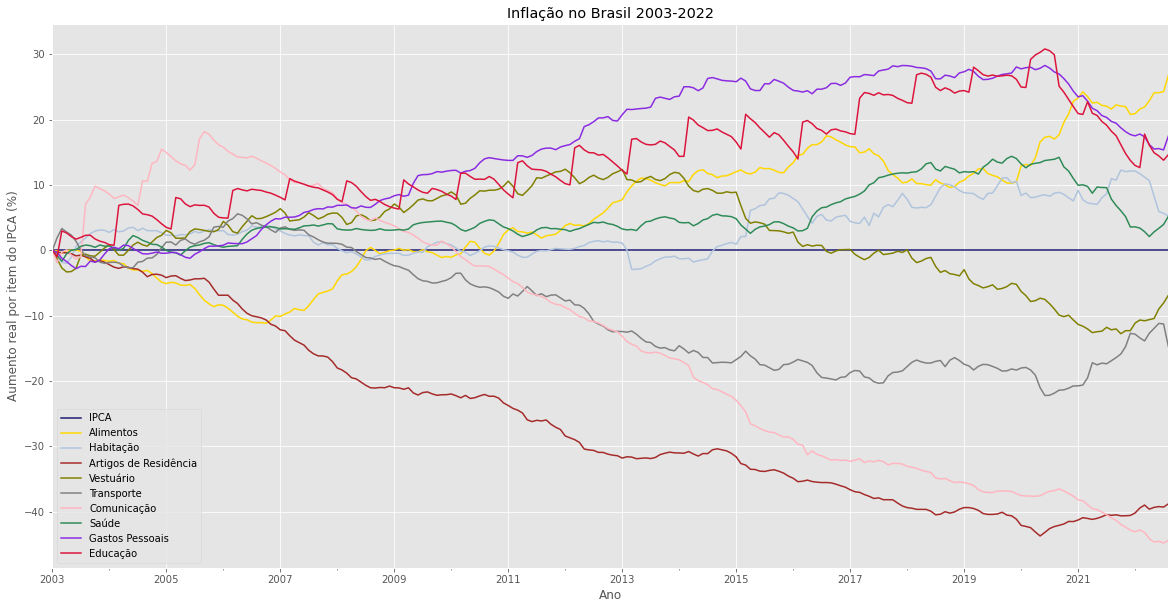

In [13]:
plt.style.use('ggplot')
# plotando o gráfico
ipca_def.plot(figsize=(20,10), color=['midnightblue', 'gold', 'lightsteelblue', 'brown', 'olive', 'gray', 'lightpink', 'seagreen', 'blueviolet', 'crimson'])

plt.xlabel('Ano')
plt.ylabel('Aumento real por item do IPCA (%)')
# definindo labels, título e legenda
plt.title('Inflação no Brasil 2003-2022')
plt.legend(['IPCA', 'Alimentos', 'Habitação', 'Artigos de Residência', 'Vestuário', 'Transporte', 'Comunicação', 'Saúde', 'Gastos Pessoais', 'Educação'])

plt.show()

**Note que agora temos uma reta azul sobre o eixo X que é exatamente o Índice numérico referente ao IPCA. Podemos ver que muitos itens ficaram bem mais caros, como educação e gastos pessoais, mas principalmente alimentação, onde houve um crescimento real de quase 30% nos preços. Enquanto isso, outros itens ficaram muito mais baratos, como comunicação e artigos de residência, com uma redução real nos preços de quase 40%.**